<a href="https://colab.research.google.com/github/M-torki/NeuroMLNet/blob/main/Energies_Sklearn_Classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
cd /gdrive/My\ Drive/

/gdrive/My Drive


In [3]:
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle
import keras
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score

In [4]:
#@title cnfusion_matrix_plotter
def conf_plotter(y_true, y_pred, classes,
                      normalize=0,
                      title=None,
                      cmap=plt.cm.pink_r,
                      mode = 'train',
                      save = 0,
                      name = 'conf.jpg'):

    # if not title:
    #     if mode == 'train':
    #         title = 'Normalized confusion matrix on train dataset'
    #     if mode == 'test':
    #         title = 'Normalized confusion matrix on test dataset'
    #     if mode == 'prob':
    #         title = 'Normalized confusion matrix on Non-Overlapping test dataset'
            

    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    fig, ax = plt.subplots(figsize=(4,4))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax ,fraction=0.046, pad=0.04)
    ax.set(xticks=np.arange(cm.shape[0]),
           yticks=np.arange(cm.shape[1]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel= 'True label',
           xlabel='Predicted label')
    
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] ):
                    
        item.set_fontsize(12)
     
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):
        
        item.set_fontsize(10)

        
                
    plt.gca().invert_yaxis()
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    if save == 1:
        plt.savefig(name)
    return ax

In [20]:
df_tot = pd.read_csv('df_tot.csv')
df_tot[:2]

,CEN-DMN,CEN,DAN-CEN-DMN,DAN-CEN,DAN-DMN,DAN-SN-CEN,DAN-SN-DMN,DAN-SN,DAN,DMN,SMN-CEN-DMN,SMN-CEN,SMN-DAN-CEN,SMN-DAN-DMN,SMN-DAN-SN,SMN-DAN,SMN-DMN,SMN-SN-CEN,SMN-SN-DMN,SMN-SN,SMN,SN-CEN-DMN,SN-CEN,SN-DMN,SN,VN-CEN-DMN,VN-CEN,VN-DAN-CEN,VN-DAN-DMN,VN-DAN-SN,VN-DAN,VN-DMN,VN-SMN-CEN,VN-SMN-DAN,VN-SMN-DMN,VN-SMN-SN,VN-SMN,VN-SN-CEN,VN-SN-DMN,VN-SN,VN,between hemispheres,left hemisphere,right hemisphere,whole brain network,Age,Label
0,-0.008526,-0.012281,-0.007264,-0.007900,-0.006128,-0.006246,-0.005109,-0.004930,-0.009704,-0.009732,-0.006414,-0.005902,-0.005790,-0.005773,-0.006225,-0.006287,-0.006926,-0.006517,-0.006262,-0.009237,-0.030533,-0.006565,-0.006906,-0.005103,-0.015467,-0.009730,-0.014582,-0.010101,-0.007836,-0.006834,-0.010708,-0.009982,-0.007076,-0.006145,-0.006618,-0.006804,-0.006151,-0.008905,-0.006799,-0.00822,-0.054997,-0.005313,-0.005953,-0.005660,-0.005435,2,0
1,-0.004933,-0.007622,-0.004079,-0.005643,-0.003190,-0.003886,-0.003051,-0.003771,-0.010898,-0.013407,-0.004861,-0.004968,-0.006321,-0.005838,-0.007481,-0.011077,-0.006437,-0.004892,-0.005345,-0.008515,-0.033681,-0.003605,-0.003364,-0.003335,-0.007668,-0.003922,-0.004250,-0.004391,-0.003202,-0.003552,-0.004460,-0.003473,-0.005566,-0.008164,-0.005738,-0.007091,-0.010015,-0.003311,-0.003108,-0.00368,-0.018540,-0.004124,-0.004613,-0.004796,-0.004268,2,0


In [35]:
df_tot = df_tot.sample(frac=1).reset_index(drop=True)

In [36]:
Y = df_tot['Label']
X = df_tot.drop(columns=['Label'])
X[:2]

,CEN-DMN,CEN,DAN-CEN-DMN,DAN-CEN,DAN-DMN,DAN-SN-CEN,DAN-SN-DMN,DAN-SN,DAN,DMN,SMN-CEN-DMN,SMN-CEN,SMN-DAN-CEN,SMN-DAN-DMN,SMN-DAN-SN,SMN-DAN,SMN-DMN,SMN-SN-CEN,SMN-SN-DMN,SMN-SN,SMN,SN-CEN-DMN,SN-CEN,SN-DMN,SN,VN-CEN-DMN,VN-CEN,VN-DAN-CEN,VN-DAN-DMN,VN-DAN-SN,VN-DAN,VN-DMN,VN-SMN-CEN,VN-SMN-DAN,VN-SMN-DMN,VN-SMN-SN,VN-SMN,VN-SN-CEN,VN-SN-DMN,VN-SN,VN,between hemispheres,left hemisphere,right hemisphere,whole brain network,Age
0,-0.008658,-0.011706,-0.006769,-0.007008,-0.006057,-0.004558,-0.004765,-0.003172,-0.011147,-0.020500,-0.004634,-0.003123,-0.004064,-0.004038,-0.003405,-0.003949,-0.003919,-0.003386,-0.003968,-0.003910,-0.007139,-0.006050,-0.004532,-0.005851,-0.011075,-0.005985,-0.004192,-0.005173,-0.005235,-0.003571,-0.005903,-0.005652,-0.002979,-0.003661,-0.003701,-0.003086,-0.003221,-0.003621,-0.004713,-0.003557,-0.025330,-0.003497,-0.004351,-0.003861,-0.003648,1
1,-0.006503,-0.008775,-0.006033,-0.006196,-0.006594,-0.004804,-0.005186,-0.004433,-0.019829,-0.009774,-0.003672,-0.003106,-0.003719,-0.003737,-0.003522,-0.003766,-0.002816,-0.003344,-0.003371,-0.003582,-0.011913,-0.005404,-0.004648,-0.005260,-0.005162,-0.004514,-0.004127,-0.005174,-0.005239,-0.004622,-0.008823,-0.004098,-0.002780,-0.003880,-0.002709,-0.002785,-0.002858,-0.003549,-0.003870,-0.003378,-0.050082,-0.003186,-0.003826,-0.003477,-0.003301,2


In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.85,random_state=42, shuffle=True)
print(X_train.shape , X_test.shape , y_train.shape , y_test.shape)

(204, 46) (36, 46) (204,) (36,)


---

##:)


---



## ************* Classifiers: ************

---

## RandomForest :)


---



train_acc: 0.75
test_acc: 0.4722222222222222
Evaluation on Train dataset
              precision    recall  f1-score   support

     Control       0.76      0.74      0.75       102
      Autism       0.74      0.76      0.75       102

    accuracy                           0.75       204
   macro avg       0.75      0.75      0.75       204
weighted avg       0.75      0.75      0.75       204


Evaluation on Test dataset
              precision    recall  f1-score   support

     Control       0.47      0.50      0.49        18
      Autism       0.47      0.44      0.46        18

    accuracy                           0.47        36
   macro avg       0.47      0.47      0.47        36
weighted avg       0.47      0.47      0.47        36



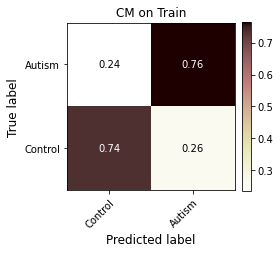

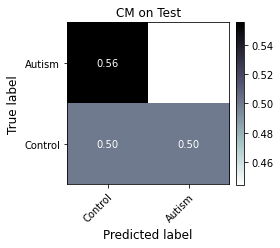

In [39]:
#@title RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier(max_depth=50, random_state=42, min_samples_leaf=40 , n_estimators=5000)
clf.fit(X_train, y_train)

###############################################################################################

y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print('train_acc:' ,accuracy_score(y_pred_train,y_train))
print('test_acc:' ,accuracy_score(y_pred_test,y_test))

###############################################################################################

print('Evaluation on Train dataset')

pr = clf.predict(X_train)

print(classification_report(y_train, pr , target_names=['Control' , 'Autism']))

conf_plotter(y_train , pr , ['Control' , 'Autism'] , normalize=1, cmap = plt.cm.pink_r ,
             title='CM on Train', save=0 , name='conf1.png')

###############################################################################################
print('')
print('Evaluation on Test dataset')

pr = clf.predict(X_test)

print(classification_report(y_test, pr , target_names=['Control' , 'Autism'] , ))

conf_plotter(y_test , pr , ['Control' , 'Autism'] , normalize=1, cmap = plt.cm.bone_r ,
             title='CM on Test', save=0 , name='conf1.png')



---

## LGBM :)


---



/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and bei

train_acc: 0.5
test_acc: 0.5
Evaluation on Train dataset
              precision    recall  f1-score   support

     Control       0.50      1.00      0.67       102
      Autism       0.00      0.00      0.00       102

    accuracy                           0.50       204
   macro avg       0.25      0.50      0.33       204
weighted avg       0.25      0.50      0.33       204

Evaluation on Test dataset
              precision    recall  f1-score   support

     Control       0.50      1.00      0.67        18
      Autism       0.00      0.00      0.00        18

    accuracy                           0.50        36
   macro avg       0.25      0.50      0.33        36
weighted avg       0.25      0.50      0.33        36



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


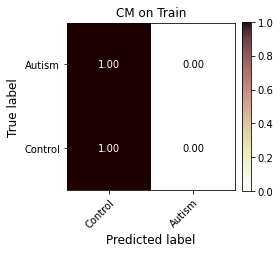

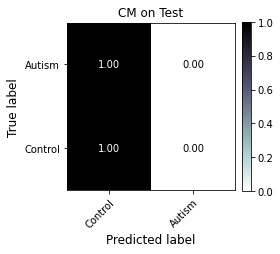

In [51]:
#@title LightGBM
import lightgbm as lgb

lgb_params = {
    'boosting_type': 'gbdt',
    'objective': 'Binary',
    # 'num_class': 4,  
    'num_leaves' : 500,  
    'min_data_in_leaf' : 1000 ,
    'max_bin' : 500 ,
    # 'metric' :'multi_logloss',
    'min_data_in_leaf':150 ,
    'is_unbalance' : False,
    'learning_rate': 0.01,
    'num_iterations' : 10000,
    'subsample': .9,
    'colsample_bytree': 0.5,
    'reg_alpha': .01,
    'reg_lambda': .01,
    'min_split_gain': 0.01,
    'min_child_weight': 2,
    'n_estimators': 10000,
    'silent': -1,
    'verbose': -1,
    'max_depth':20,
}

clf = lgb.LGBMClassifier(**lgb_params)# , sample_weight=np.vectorize(w.get)(y_train) )
clf.fit(X_train, y_train)

###############################################################################################

y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

###############################################################################################

print('train_acc:' ,accuracy_score(y_pred_train,y_train))
print('test_acc:' ,accuracy_score(y_pred_test,y_test))

###############################################################################################

print('Evaluation on Train dataset')

pr = clf.predict(X_train)

print(classification_report(y_train, pr , target_names=['Control' , 'Autism']))

conf_plotter(y_train , pr , ['Control' , 'Autism'] , normalize=1, cmap = plt.cm.pink_r ,
             title='CM on Train', save=0 , name='conf1.png')

###############################################################################################

print('Evaluation on Test dataset')

pr = clf.predict(X_test)

print(classification_report(y_test, pr , target_names=['Control' , 'Autism']))

conf_plotter(y_test , pr , ['Control' , 'Autism'] , normalize=1, cmap = plt.cm.bone_r ,
             title='CM on Test', save=0 , name='conf1.png')

---

## SVM :)


---




train_acc: 0.7352941176470589
test_acc: 0.5555555555555556
Evaluation on Train dataset
              precision    recall  f1-score   support

     Control       0.76      0.69      0.72       102
      Autism       0.71      0.78      0.75       102

    accuracy                           0.74       204
   macro avg       0.74      0.74      0.73       204
weighted avg       0.74      0.74      0.73       204

Evaluation on Test dataset
              precision    recall  f1-score   support

     Control       0.56      0.56      0.56        18
      Autism       0.56      0.56      0.56        18

    accuracy                           0.56        36
   macro avg       0.56      0.56      0.56        36
weighted avg       0.56      0.56      0.56        36



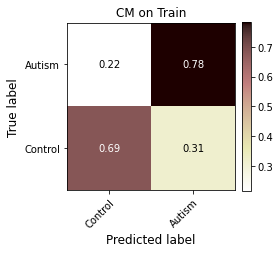

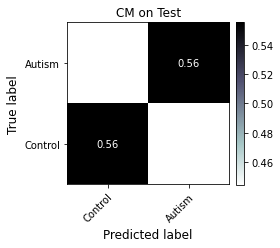

In [41]:
#@title Support Vector Machines
from sklearn import svm

clf = svm.SVC(C=7 ,gamma=100 , degree=20)
clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
###############################################################################################

print('train_acc:' ,accuracy_score(y_pred_train,y_train))
print('test_acc:' ,accuracy_score(y_pred_test,y_test))

###############################################################################################

print('Evaluation on Train dataset')

pr = clf.predict(X_train)

print(classification_report(y_train, pr , target_names=['Control' , 'Autism']))

conf_plotter(y_train , pr , ['Control' , 'Autism'] , normalize=1, cmap = plt.cm.pink_r ,
             title='CM on Train', save=0 , name='conf1.png')

###############################################################################################

print('Evaluation on Test dataset')

pr = clf.predict(X_test)

print(classification_report(y_test, pr , target_names=['Control' , 'Autism']))

conf_plotter(y_test , pr , ['Control' , 'Autism'] , normalize=1, cmap = plt.cm.bone_r ,
             title='CM on Test', save=0 , name='conf1.png')

---

## XGBoost:)

---


      Iter       Train Loss   Remaining Time 
         1           1.3853            0.21s
         2           1.3842            0.20s
         3           1.3832            0.20s
         4           1.3822            0.19s
         5           1.3812            0.18s
         6           1.3802            0.18s
         7           1.3791            0.17s
         8           1.3781            0.17s
         9           1.3771            0.16s
        10           1.3761            0.16s
        20           1.3661            0.10s
        30           1.3563            0.05s
        40           1.3468            0.00s
train_score: 0.8137254901960784
test_score: 0.4722222222222222
Evaluation on Train dataset
              precision    recall  f1-score   support

     Control       0.74      0.96      0.84       102
      Autism       0.94      0.67      0.78       102

    accuracy                           0.81       204
   macro avg       0.84      0.81      0.81       204
weight

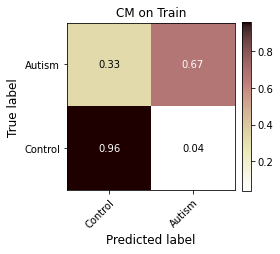

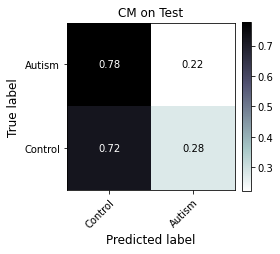

In [50]:
#@title XGBoost
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=40, learning_rate=0.001, verbose=1,
                                   max_depth=5, random_state=42)
clf.fit(X_train, y_train)
###############################################################################################

print('train_score:', clf.score(X_train, y_train))
print('test_score:',clf.score(X_test, y_test))

###############################################################################################

print('Evaluation on Train dataset')

pr = clf.predict(X_train)

print(classification_report(y_train, pr , target_names=['Control' , 'Autism']))

conf_plotter(y_train , pr , ['Control' , 'Autism'] , normalize=1, cmap = plt.cm.pink_r ,
             title='CM on Train', save=0 , name='conf1.png')

print('train_acc:' ,accuracy_score(y_pred_train,y_train))

###############################################################################################

print('Evaluation on Test dataset')

pr = clf.predict(X_test)

print(classification_report(y_test, pr , target_names=['Control' , 'Autism']))

conf_plotter(y_test , pr , ['Control' , 'Autism'] , normalize=1, cmap = plt.cm.bone_r ,
             title='CM on Test', save=0 , name='conf1.png')

print('test_acc:' ,accuracy_score(y_pred_test,y_test))
